In [86]:
import pandas as pd
import numpy as np

In [87]:
gens = pd.read_csv("c:/Users/grace/Rdata/gens.csv")
p_gens = pd.read_csv("c:/Users/grace/Rdata/pred.csv")
wf = pd.read_csv("c:/Users/grace/Rdata/weather_forecast.csv")

## 1차 EDA

In [88]:
# 발전량 예측량을 모델별로 분리해서 변수로 만들라고 분리하는거
p_gens0 = p_gens.loc[(p_gens["model_id"]==0) & (p_gens["round"]==1)].reset_index()
p_gens1 = p_gens.loc[(p_gens["model_id"]==1) & (p_gens["round"]==1)].reset_index()
p_gens2 = p_gens.loc[(p_gens["model_id"]==2) & (p_gens["round"]==1)].reset_index()
p_gens3 = p_gens.loc[(p_gens["model_id"]==3) & (p_gens["round"]==1)].reset_index()
p_gens4 = p_gens.loc[(p_gens["model_id"]==4) & (p_gens["round"]==1)].reset_index()

In [89]:
# 날씨 예측량을 round1,2로 분리함
wf_round1 = wf[wf["round"]==1]
wf_round2 = wf[wf["round"]==2]

In [90]:
# 최종 데이터
x_df = pd.DataFrame({"m0": p_gens0["amount"],"m1": p_gens1["amount"],
              "m2": p_gens2["amount"],"m3": p_gens3["amount"],
              "m4": p_gens4["amount"], "time" : p_gens0["time"]})
y_df= gens["amount"]

In [91]:
# time을 기준으로 두 데이터 병합 ( p_gens, wf )
# round2에 대해 수행해야하면 wf_round2/ 아니면 wf_round1
xx_df = pd.merge(x_df,wf_round1,on="time")

In [92]:
xx_df['time'] = pd.to_datetime(xx_df['time'])  # 날짜 및 시간 열을 날짜 형식으로 변환
xx_df['hour'] = xx_df['time'].dt.hour  # 시간대 정보를 추출하여 'hour' 열을 생성

In [93]:
# 'time' 열의 Timestamp 객체를 연-월-일 형식의 문자열로 변환
xx_df['day'] = xx_df['time'].dt.strftime('%Y-%m-%d')


In [94]:

# 월(month) 정보를 추출하여 'month' 열 생성
xx_df['month'] = xx_df['time'].dt.month

# 계절별로 데이터 분할
summer_data = xx_df[(xx_df['month'] >= 6) & (xx_df['month'] <= 9)]  # 6월부터 9월까지: 여름
fall_data = xx_df[(xx_df['month'] >= 10) & (xx_df['month'] <= 11)]  # 10월부터 11월까지: 가을
winter_data = xx_df[(xx_df['month'] >= 12) | (xx_df['month'] <= 2)]  # 12월부터 2월까지: 겨울
spring_data = xx_df[(xx_df['month'] >= 3) & (xx_df['month'] <= 5)]  # 3월부터 5월까지: 봄

# 'time' 열을 날짜 형식으로 변환
gens['time'] = pd.to_datetime(gens['time'])

# 월(month) 정보를 추출하여 'month' 열 생성
gens['month'] = gens['time'].dt.month

# 계절별로 데이터 분할
summer_gens = gens[(gens['month'] >= 6) & (gens['month'] <= 9)]  # 여름
fall_gens = gens[(gens['month'] >= 10) & (gens['month'] <= 11)]  # 가을
winter_gens = gens[(gens['month'] >= 12) | (gens['month'] <= 2)]  # 겨울
spring_gens = gens[(gens['month'] >= 3) & (gens['month'] <= 5)]  # 봄

In [95]:
# 10-11월 데이터만 쓸 거임
fall_data = pd.merge(fall_gens,fall_data,on="time")
# 'time' 'round' 열 제거
fall_data = fall_data.drop(['time', 'round'], axis='columns')

In [96]:
# 7시부터 19시만 남기기
x7to19_df = fall_data[(fall_data['hour'] >= 7) & (fall_data['hour'] <= 19)]
x7to19_df.set_index('day', inplace=True)


# 필터링된 결과 출력
x7to19_df.head()

,amount,month_x,m0,m1,m2,m3,m4,cloud,temp,humidity,...,wind_dir,rain,snow,dew_point,vis,uv_idx,azimuth,elevation,hour,month_y
day,,,,,,,,,,,,,,,,,,,,,
2022-10-01,0.0,10,1.75178,6.71131,0.121228,4.81546,0.00000,85,18.85,62,...,58,0.0,0.0,15.5556,16.0934,1,97.7138,5.66302,7,10
2022-10-01,12.0,10,11.98790,18.96750,4.828220,11.25420,6.20317,88,19.32,60,...,54,0.0,0.0,16.1111,16.0934,2,106.8580,17.68800,8,10
2022-10-01,25.0,10,28.47810,27.97400,16.245000,26.23550,23.78900,90,20.09,58,...,68,0.0,0.0,15.5556,16.0934,2,117.4770,29.08990,9,10
2022-10-01,58.0,10,44.17050,45.66870,40.111800,49.35050,41.15890,100,20.73,56,...,57,0.0,0.0,15.0000,16.0934,4,130.7910,39.29220,10,10
2022-10-01,74.0,10,55.64430,58.05350,56.539500,65.71490,52.34460,100,21.83,53,...,48,0.0,0.0,13.8889,16.0934,5,148.2630,47.31360,11,10


## 한 시간 단위로 데이터셋 나누기

In [97]:
def split_by_hour(x7to19_df):
  
  # 시간별로 데이터를 나누는 함수 정의
  split_dfs = []
  for hour in range(7, 20):
    split_df = x7to19_df[x7to19_df['hour'] == hour]
    split_dfs.append(split_df)

  return split_dfs

In [98]:
# 데이터셋을 시간별로 나누자
split_dfs = split_by_hour(x7to19_df.copy())

# 시간별 데이터프레임을 출력
for split_df in split_dfs:
  print(split_df)

            amount  month_x        m0        m1        m2        m3        m4  \
day                                                                             
2022-10-01     0.0       10  1.751780   6.71131  0.121228  4.815460   0.00000   
2022-10-02     2.0       10  1.376130   2.17726  0.069965  1.843220   2.00878   
2022-10-03     1.0       10  0.788973   4.48308  0.162714  2.519120   0.00000   
2022-10-04     0.0       10  1.009940   0.00000  0.042522  0.110007   0.00000   
2022-10-05     2.0       10  1.383010   5.39155  0.077832  3.080890   0.00000   
...            ...      ...       ...       ...       ...       ...       ...   
2023-10-11     0.0       10  1.511680   4.29272  0.255343  2.326550   0.00000   
2023-10-12     1.0       10  1.624670   4.69337  0.149159  2.566940   0.00000   
2023-10-13     0.0       10  1.186240   2.52457  0.074702  2.404730   7.56969   
2023-10-14     0.0       10  2.720630   4.53169  0.193805  0.670359  14.25090   
2023-10-15     0.0       10 

            amount  month_x       m0       m1       m2       m3       m4  \
day                                                                        
2022-10-01    51.0       10  38.8146  45.9832  40.4221  42.4812  35.9542   
2022-10-02    35.0       10  27.8228  26.4880  19.0653  21.8189  35.2111   
2022-10-03    31.0       10  32.7898  29.2204  31.0494  28.9308  56.3908   
2022-10-04    20.0       10  13.4267  11.0231  14.7138  10.0857  38.1031   
2022-10-05    56.0       10  33.1179  37.3037  34.3229  42.6211  17.5903   
...            ...      ...      ...      ...      ...      ...      ...   
2023-10-11    53.0       10  44.9622  41.7124  41.6352  38.8868  18.8443   
2023-10-12    47.0       10  31.7521  36.1489  30.0596  38.1232  29.5711   
2023-10-13    25.0       10  29.2760  33.7149  31.0720  34.7649  51.5585   
2023-10-14    44.0       10  36.0440  38.6188  37.3145  32.5556  66.8627   
2023-10-15    47.0       10  38.2118  36.5026  37.2173  37.5207  31.7351   

           

## API에서 호출된 값 전처리 후 한 시간 단위로 데이터셋 쪼개기

In [300]:
import pandas as pd
import numpy as np

# 데이터를 불러옴
x_pred_ori = pd.read_csv("../Rdata/gen_forecasts/gen_fcst_10_2023-11-01.csv") 
x_pred_wf = pd.read_csv("../Rdata/weather_forecasts/wf10_2023-11-01.csv") 

In [301]:
# 시간을 기준으로 예측 발전량과 기상 예측값 합치기
x_pred_df = pd.merge(x_pred_ori,x_pred_wf,on='time')
x_pred_df['time'] = pd.to_datetime(x_pred_df['time'])  # 날짜 및 시간 열을 날짜 형식으로 변환
x_pred_df['hour'] = x_pred_df['time'].dt.hour  # 시간대 정보를 추출하여 'hour' 열을 생성

In [302]:
# 7시부터 19시까지만 남기고 나머지 제거, 'hour'로 인덱싱
x_pred_df = x_pred_df[(x_pred_df['hour'] >= 7) & (x_pred_df['hour'] <= 19)]
x_pred_df.set_index('hour', inplace=True)
# time 열 제거
x_pred_df = x_pred_df.drop(['time'], axis='columns')

In [303]:
# 과거 데이터의 오른쪽 끝에도 hour가 있는데, drop하기 귀찮아서 그냥 api 데이터에 추가함.
hour = [7,8,9,10,11,12,13,14,15,16,17,18,19]
x_pred_df['hour'] = hour
x_pred_df

,model1,model2,model3,model4,model5,cloud,temp,humidity,ground_press,wind_speed,wind_dir,rain,snow,dew_point,vis,uv_idx,azimuth,elevation,hour
hour,,,,,,,,,,,,,,,,,,,
7,1.31294,3.69868,0.155813,1.56416,0.00000,0.0,17.07,83.0,1021.0,4.07,177.0,0.0,0.0,13.8889,16.0934,0.0,107.702,0.37326,7
8,5.30788,11.84840,1.727630,9.43259,4.43479,0.0,17.47,83.0,1021.0,4.31,174.0,0.0,0.0,14.4444,16.0934,1.0,116.796,11.76660,8
9,23.03830,25.30940,15.116900,25.50220,23.58480,0.0,18.42,81.0,1022.0,4.74,185.0,0.0,0.0,15.0000,16.0934,2.0,127.398,22.20040,9
10,39.65350,41.00780,37.011000,44.10330,51.90400,0.0,19.31,77.0,1022.0,5.87,200.0,0.0,0.0,15.5556,16.0934,3.0,140.290,31.09230,10
11,57.72970,52.15210,53.123600,60.35990,63.93200,0.0,19.76,74.0,1021.0,6.50,207.0,0.0,0.0,15.0000,16.0934,3.0,156.064,37.60330,11
12,66.86570,62.21170,65.425100,75.00280,74.56950,0.0,19.98,72.0,1021.0,6.88,214.0,0.0,0.0,15.0000,16.0934,4.0,174.405,40.75070,12
13,62.45690,60.33800,63.794100,70.00260,78.97080,0.0,19.96,74.0,1021.0,6.89,222.0,0.0,0.0,15.5556,16.0934,3.0,193.469,39.88500,13
14,57.81960,56.51250,58.468300,62.20900,66.39040,0.0,19.93,75.0,1020.0,7.09,222.0,0.0,0.0,15.5556,16.0934,3.0,210.855,35.19870,14
15,45.46680,44.06920,44.835800,48.83650,59.63190,0.0,19.83,78.0,1020.0,7.02,222.0,0.0,0.0,15.5556,16.0934,2.0,225.366,27.56010,15


## 유사도 계산

In [304]:
# 유클리디안 거리 함수 정의
def distMetric(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [305]:
min_dates = [] # 빈 날짜 리스트 생성
for i in range(0, 13):
    distColumn = [] # 빈 거리 리스트 생성
    for index, row in split_dfs[i].iterrows():
        d = distMetric(row, x_pred_df.iloc[0]) # 과거 데이터 - API 간의 유사도 계산
        distColumn.append(d)
        minIdx = np.argmin(distColumn)
    # distance 열의 최솟값이 있는 행을 찾아서 날짜 리스트에 추가
    min_date = split_dfs[i].index[minIdx]
    min_dates.append(min_date)
min_dates

['2022-11-28',
 '2023-10-14',
 '2022-11-28',
 '2022-10-03',
 '2022-10-03',
 '2022-11-12',
 '2022-11-12',
 '2022-11-12',
 '2022-11-12',
 '2022-11-12',
 '2022-11-12',
 '2022-10-03',
 '2022-10-03']

In [306]:
# 거리가 최소인 날짜 api 데이터에 day열로 추가해주기
x_pred_df["day"] = min_dates

## 발전량 데이터도 똑같이 전처리 해주기

In [307]:
gens = pd.read_csv("../Rdata/gens.csv")

In [308]:
# 'time'열 시간 형식 변환
gens['time'] = pd.to_datetime(gens['time'])
gens['hour'] = gens['time'].dt.hour  # 시간대 정보를 추출하여 'hour' 열을 생성
# 'time' 열의 Timestamp 객체를 연-월-일 형식의 문자열로 변환
gens['day'] = gens['time'].dt.strftime('%Y-%m-%d')
# 'time'열 제거
gens = gens.drop(['time'], axis='columns')


In [309]:
# 7시부터 19시까지만 남기기
gen = gens[(gens['hour'] >= 7) & (gens['hour'] <= 19)]

In [310]:
def split_by_hour(gen):
  
  # 시간별로 데이터를 나눕니다.
  gen_dfs = []
  for hour in range(7, 20):
    gen_df = gen[gen['hour'] == hour]
    gen_dfs.append(gen_df)

  return gen_dfs

In [311]:
# 데이터셋을 시간별로 나눕니다.
gen_dfs = split_by_hour(gen.copy())

# 시간별 데이터프레임을 출력합니다.
for gen_df in gen_dfs:
  print(gen_df)

       amount  hour         day
6         5.0     7  2022-06-19
30        8.0     7  2022-06-20
54        5.0     7  2022-06-21
78        8.0     7  2022-06-22
102       3.0     7  2022-06-23
...       ...   ...         ...
11502     0.0     7  2023-10-11
11526     1.0     7  2023-10-12
11550     0.0     7  2023-10-13
11574     0.0     7  2023-10-14
11598     0.0     7  2023-10-15

[484 rows x 3 columns]
       amount  hour         day
7        14.0     8  2022-06-19
31       20.0     8  2022-06-20
55       14.0     8  2022-06-21
79       24.0     8  2022-06-22
103       8.0     8  2022-06-23
...       ...   ...         ...
11503    13.0     8  2023-10-11
11527    13.0     8  2023-10-12
11551     6.0     8  2023-10-13
11575    10.0     8  2023-10-14
11599    10.0     8  2023-10-15

[484 rows x 3 columns]
       amount  hour         day
8        22.0     9  2022-06-19
32       39.0     9  2022-06-20
56       26.0     9  2022-06-21
80       43.0     9  2022-06-22
104      11.0     9  202

## 최종 예측값 

In [312]:
final_pred = [] # 빈 최종 예측값 리스트 생성
for i in range(0, 13):
    amount = gen_dfs[i][gen_dfs[i]["day"] == min_dates[i]] # 발전량의 날짜와 거리가 최소인 날짜 비교
    final_amount = amount["amount"].values[0] # 특정 날짜에 해당하는 발전량 추출
    final_pred.append(final_amount) 
final_pred

[0.0, 10.0, 14.0, 20.0, 46.0, 30.0, 33.0, 24.0, 18.0, 25.0, 6.0, 5.0, 0.0]

In [313]:
# 앞에 0을 6개 추가
pred=final_pred

pred = np.concatenate((np.zeros(6), pred))

# 뒤에 0을 5개 추가
pred = np.concatenate((pred, np.zeros(5)))

# 결과 배열
print(pred)

[ 0.  0.  0.  0.  0.  0.  0. 10. 14. 20. 46. 30. 33. 24. 18. 25.  6.  5.
  0.  0.  0.  0.  0.  0.]


## 모델 성능 정리

In [314]:
import numpy as np

def testMSEnIncentive(pred,day):
    realGens1030 = np.array(day)    
    
    rss = np.power(pred - realGens1030, 2)
    rss1 = rss[6:10]
    rss2 = rss[10:14]
    rss3 = rss[14:19]
    mse1 = sum(rss1/len(rss1))
    mse2 = sum(rss2/len(rss2))
    mse3 = sum(rss3/len(rss3))
    mse = [mse1,mse2,mse3]

    score_df = abs(pred - realGens1030)*100/99
    score = []
    for idx, i in enumerate(score_df):
        if i <=6:
            score.append(realGens1030[idx] * 4)
        elif (i <=8) & (i > 6):
            score.append(realGens1030[idx] * 3)
        else:
            score.append(0)
    score1 = score[6:10]
    score2 = score[10:14]
    score3 = score[14:19]
    final_score = [score1,score2,score3]
    
    sum_score = sum(score)

    return mse, final_score , score, sum_score

In [315]:
real_dict = {"1025" : [0, 0, 0, 0, 0, 0,
                      0, 10, 31, 54, 70, 72, 78, 73, 63, 40, 20, 3, 0,
                      0, 0, 0, 0, 0],
             "1026" : [0, 0, 0, 0, 0, 0,
                      1, 3, 11, 40, 61, 52, 75, 61, 62, 40, 18, 2, 0,
                      0, 0, 0, 0, 0],
             "1027" : [0, 0, 0, 0, 0, 0,
                      1, 9, 36, 46, 53, 74, 89, 81, 64, 54, 23, 4, 0,
                      0, 0, 0, 0, 0],
             "1028" : [0, 0, 0, 0, 0, 0,
                      0, 5, 29, 56, 67, 82, 78, 72, 63, 46, 17, 3, 0,
                      0, 0, 0, 0, 0],
             "1029" : [0, 0, 0, 0, 0, 0,
                      0, 4, 20, 56, 66, 76, 53, 57, 66, 42, 20, 2, 0,
                      0, 0, 0, 0, 0],
             "1030" : [0, 0, 0, 0, 0, 0,
                      0, 4, 20, 56, 65, 79, 81, 75, 62, 45, 22, 3, 0,
                      0, 0, 0, 0, 0],
             "1031" : [0, 0, 0, 0, 0, 0,
                      0, 4, 8, 22, 37, 76, 73, 75, 58, 44, 22, 4, 0,
                      0, 0, 0, 0, 0],
             "1101" : [0, 0, 0, 0, 0, 0,
                       0, 6, 30, 51, 58, 68, 68, 69, 55, 38, 18, 1, 0,
                       0, 0, 0, 0, 0],
             "1102" : [0, 0, 0, 0, 0, 0,
                       0, 4, 32, 46, 71, 76, 79, 73, 64, 44, 22, 4, 0,
                       0, 0, 0, 0, 0],
			 "1103" : [0, 0, 0, 0, 0, 0, 
				       0, 6, 24, 39, 47, 71, 61, 68, 36, 35, 8, 1, 0, 
					   0, 0, 0, 0, 0],
		     "1104" : [0, 0, 0, 0, 0, 0,
					   0, 6, 20, 42, 51, 36, 37, 34, 28, 8, 4, 2, 0,
					   0, 0, 0, 0, 0],
			 "1105" : [0, 0, 0, 0, 0, 0,
					   0, 2, 16, 18, 16, 16, 10, 6, 4, 7, 4, 1, 0,
					   0, 0, 0, 0, 0],
			 "1106" : [0, 0, 0, 0, 0, 0,
				       0, 0, 3, 17, 13, 16, 24, 48, 46, 31, 23, 4, 0,
					   0, 0, 0, 0, 0]
						  }

## 날짜 입력 

In [316]:
# 사용방법 입니다 참고용
day = real_dict["1101"]
testMSEnIncentive(pred,day)

([308.25, 1209.5, 339.6],
 [[0, 24, 0, 0], [0, 0, 0, 0], [0, 0, 0, 4, 0]],
 [0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
 28)

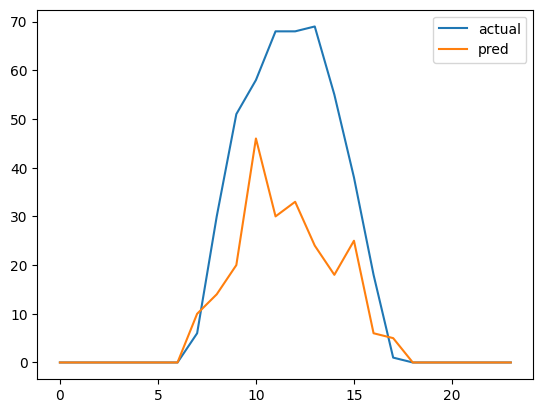

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_gen_plot(actual,pred):

    plt.figure()
    sns.lineplot(actual,label="actual")
    sns.lineplot(pred,label="pred")
    plt.legend()

# 사용법 예시
# pred그냥 예측 나온 13개만 넣으면됩니다.
# actual에 real_dict는 어제 만든겁니다. 인지좀 
actual = real_dict["1101"]

make_gen_plot(actual,pred)